# Huấn luyện mô hình - Sentiment Analysis
Notebook này thực hiện huấn luyện mô hình Logistic Regression, đánh giá hiệu suất, và lưu kết quả.

In [1]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Tải dữ liệu đã xử lý
df = pd.read_csv('../data/processed/cleaned_reviews.csv')

# Kiểm tra dữ liệu
print("5 dòng đầu của dữ liệu đã xử lý:")
display(df.head())

# Tải vectorizer đã lưu
vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')

# Vector hóa văn bản
X = vectorizer.transform(df['cleaned_review'])
y = df['sentiment']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước
print("\nKích thước dữ liệu:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

5 dòng đầu của dữ liệu đã xử lý:


,cleaned_review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1



Kích thước dữ liệu:
X_train: (40000, 5000), X_test: (10000, 5000)


In [2]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình
model = LogisticRegression(max_iter=200)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Thông báo hoàn thành
print("Huấn luyện mô hình hoàn tất!")

Huấn luyện mô hình hoàn tất!



Accuracy: 0.89

Báo cáo phân loại:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



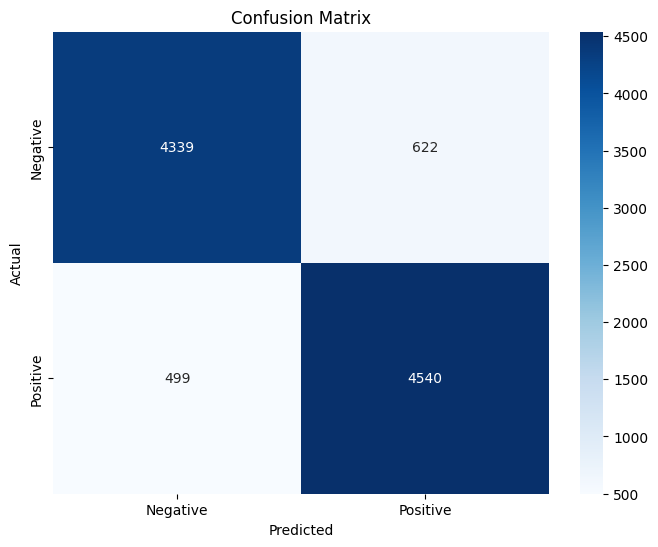

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# In báo cáo chi tiết
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Lưu biểu đồ
plt.savefig('../results/confusion_matrix.png')
plt.show()

In [4]:
# Lưu mô hình
joblib.dump(model, '../models/sentiment_model.pkl')

# Lưu kết quả đánh giá
with open('../results/metrics.txt', 'a') as f:
    f.write("\nKết quả huấn luyện mô hình:\n")
    f.write(f"Accuracy: {accuracy:.2f}\n")
    f.write("\nBáo cáo phân loại:\n")
    f.write(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

print("Mô hình và kết quả đã được lưu!")

Mô hình và kết quả đã được lưu!


In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tải tài nguyên nltk
nltk.download('punkt')
nltk.download('stopwords')


# Hàm dự đoán cảm xúc
def predict_sentiment(text, vectorizer, model):
    # Tiền xử lý văn bản
    cleaned_text = preprocess_text(text)
    # Vector hóa
    X_new = vectorizer.transform([cleaned_text])
    # Dự đoán
    prediction = model.predict(X_new)
    return 'Positive' if prediction[0] == 1 else 'Negative'

# Hàm tiền xử lý (sao chép từ preprocessing.ipynb)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Thử nghiệm
sample_review = "This movie was absolutely bad!"
print(f"\nĐánh giá mẫu: {sample_review}")
print(f"Dự đoán: {predict_sentiment(sample_review, vectorizer, model)}")


Đánh giá mẫu: This movie was absolutely bad!
Dự đoán: Negative


[nltk_data] Downloading package punkt to /home/tankuvie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tankuvie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
model_v1 = LogisticRegression(max_iter=200, C=0.1)

model_v1.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=200)

In [10]:
y_pred_v1 = model_v1.predict(X_test)

accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(f"\nAccuracy (v1): {accuracy_v1:.2f}")


Accuracy (v1): 0.87


In [12]:
# Lấy trọng số và tên đặc trưng
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Tạo DataFrame cho trọng số
coef_df = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})

# Sắp xếp để lấy 10 từ tích cực và tiêu cực nhất
top_positive = coef_df.sort_values(by='coefficient', ascending=False).head(10)
top_negative = coef_df.sort_values(by='coefficient').head(10)

print("\n10 từ có trọng số cao nhất (tích cực):")
display(top_positive)
print("\n10 từ có trọng số thấp nhất (tiêu cực):")
display(top_negative)


10 từ có trọng số cao nhất (tích cực):


,word,coefficient
1973,great,6.879644
1565,excellent,6.496616
3219,perfect,4.965059
468,best,4.843323
4930,wonderful,4.786048
219,amazing,4.570917
581,brilliant,4.399092
1684,favorite,4.329654
62,710,4.264567
2672,loved,4.248710



10 từ có trọng số thấp nhất (tiêu cực):


,word,coefficient
4954,worst,-10.070348
4822,waste,-7.837058
387,bad,-7.223144
378,awful,-7.138624
542,boring,-6.448858
4428,terrible,-5.771577
3323,poor,-5.737013
3049,nothing,-5.498801
1395,dull,-5.123909
3324,poorly,-5.090989
